In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the CSV file, specifying the header row based on inspection
file_path = 'gmdata.csv'
header_row_index = 4

gm_dataframe = pd.read_csv(file_path, header=header_row_index)

# Display the first five rows of the dataframe
print(gm_dataframe.head())


,DEPTH,RHOB,DTC,GR,NPHI,FLAG
0,0,NaN,-9999.0,-9999.0,-9999.0,-9999
1,1,NaN,-9999.0,-9999.0,-9999.0,-9999
2,2,NaN,-9999.0,-9999.0,-9999.0,-9999
3,3,NaN,-9999.0,-9999.0,-9999.0,-9999
4,4,NaN,-9999.0,-9999.0,-9999.0,-9999


## **Data Analysis and Preprocessing**

In [ ]:
# Check and display the dimensions of the dataset
dataset_shape = gm_dataframe.shape
print(f"Dataset dimensions (rows, columns): {dataset_shape}")


(20879, 6)

In [ ]:
# Display detailed information about the dataset's structure and data types
print("Dataset Information:")
gm_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20879 entries, 0 to 20878
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   20879 non-null  int64  
 1   RHOB    20833 non-null  float64
 2   DTC     20879 non-null  float64
 3   GR      20879 non-null  float64
 4   NPHI    13818 non-null  float64
 5   FLAG    20879 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 978.8 KB


In [ ]:
# Display the count of unique values for each column in the dataset
unique_values_per_column = gm_dataframe.nunique()
print("Number of unique values per column:")
print(unique_values_per_column)


,0
DEPTH,20879
RHOB,14266
DTC,6898
GR,10306
NPHI,6137
FLAG,3


In [ ]:
# Generate and display summary statistics for the numerical columns in the dataset
summary_statistics = gm_dataframe.describe()
print("Statistical summary of the dataset:")
print(summary_statistics)


,DEPTH,RHOB,DTC,GR,NPHI,FLAG
count,20879.000000,20833.000000,20879.000000,20879.000000,13818.000000,20879.000000
mean,10439.000000,2.046633,-6412.805524,-3381.607220,-4702.592674,-3438.610326
std,6027.392471,0.427379,4835.074894,4791.416648,4991.079504,4750.112778
min,0.000000,1.030000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,5219.500000,1.905351,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,10439.000000,2.158444,-9999.000000,71.159897,0.319204,0.000000
75%,15658.500000,2.349400,98.152348,98.391449,0.426704,1.000000
max,20878.000000,2.648400,135.924301,157.502396,0.646124,1.000000


In [ ]:
# Check and display the total number of missing values in each column
missing_values_count = gm_dataframe.isnull().sum()
print("Missing values per column:")
print(missing_values_count)


,0
DEPTH,0
RHOB,46
DTC,0
GR,0
NPHI,7061
FLAG,0


**Handling Missing Values**

In [ ]:
import numpy as np

# Replace placeholder values (-9999.0 and -9999) with NaN for missing data handling
gm_dataframe.replace(to_replace=[-9999.0, -9999], value=np.nan, inplace=True)

# Display the first few rows after replacement to confirm changes
print("First five rows after replacing placeholders with NaN:")
print(gm_dataframe.head())


,DEPTH,RHOB,DTC,GR,NPHI,FLAG
0,0,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verify the number of missing values per column after placeholder replacement
missing_values_after_cleanup = gm_dataframe.isnull().sum()
print("Missing values per column after replacing placeholders:")
print(missing_values_after_cleanup)


,0
DEPTH,0
RHOB,46
DTC,13469
GR,7181
NPHI,13560
FLAG,7181


In [ ]:
# Define the key features to check for missing values
selected_features = ['RHOB', 'DTC ', 'GR', 'NPHI', 'FLAG']

# Remove rows where all selected features are NaN
gm_dataframe = gm_dataframe[~gm_dataframe[selected_features].isna().all(axis=1)]

# Display the first few rows after dropping fully missing rows
print("Preview of data after dropping rows with all NaNs in selected features:")
print(gm_dataframe.head())


,DEPTH,RHOB,DTC,GR,NPHI,FLAG
46,46,1.03,NaN,NaN,NaN,NaN
47,47,1.03,NaN,NaN,NaN,NaN
48,48,1.03,NaN,NaN,NaN,NaN
49,49,1.03,NaN,NaN,NaN,NaN
50,50,1.03,NaN,NaN,NaN,NaN


In [ ]:
# Define the second set of features to check for completely missing rows
secondary_features = ['DTC ', 'GR', 'NPHI', 'FLAG']

# Remove rows where all values in the secondary features list are NaN
gm_dataframe = gm_dataframe[~gm_dataframe[secondary_features].isna().all(axis=1)]

# Display the first few rows after performing the second cleanup step
print("Data preview after removing rows with all NaNs in secondary features:")
print(gm_dataframe.head())


,DEPTH,RHOB,DTC,GR,NPHI,FLAG
6456,6456,1.973973,NaN,NaN,0.48,NaN
6457,6457,1.974027,NaN,NaN,0.48,NaN
6458,6458,1.974080,NaN,NaN,0.48,NaN
6459,6459,1.974134,NaN,NaN,0.48,NaN
6460,6460,1.974188,NaN,NaN,0.48,NaN


In [ ]:
# Define the specific features to check for complete missing values: DTC, GR, and FLAG
features_to_verify = ['DTC ', 'GR', 'FLAG']

# Remove rows where all values in 'DTC ', 'GR', and 'FLAG' are missing (NaN)
gm_dataframe = gm_dataframe.loc[~gm_dataframe[features_to_verify].isna().all(axis=1)]

# Display the first few rows after applying the filter
print("First five rows after removing rows with all NaN values in DTC, GR, and FLAG:")
print(gm_dataframe.head())


,DEPTH,RHOB,DTC,GR,NPHI,FLAG
7162,7162,2.010974,NaN,69.289902,0.455162,0.0
7163,7163,2.011025,NaN,69.289902,0.458083,0.0
7164,7164,2.011076,NaN,70.720001,0.455265,1.0
7165,7165,2.011127,NaN,67.309898,0.466771,0.0
7166,7166,2.011178,NaN,68.439903,0.368513,0.0


In [ ]:
# Display the current shape of the dataset after all cleaning steps
print(f"Current dataset shape: {gm_dataframe.shape}")

# Check and display the number of missing values remaining in each column
remaining_missing_values = gm_dataframe.isnull().sum()
print("Remaining missing values per column:")
print(remaining_missing_values)


data shape is: (13704, 6)


,0
DEPTH,0
RHOB,0
DTC,6294
GR,6
NPHI,7091
FLAG,6


In [ ]:
# Drop rows where 'FLAG' or 'GR' columns have missing values
gm_dataframe = gm_dataframe.dropna(subset=['FLAG', 'GR'])

# Check and display remaining missing values after dropping rows
final_missing_values = gm_dataframe.isnull().sum()
print("Remaining missing values per column after dropping rows with NaNs in 'FLAG' and 'GR':")
print(final_missing_values)


,0
DEPTH,0
RHOB,0
DTC,6294
GR,0
NPHI,7085
FLAG,0


In [ ]:
# Display the final shape of the cleaned dataset
print(f"Final dataset shape after all cleaning steps: {gm_dataframe.shape}")


(13698, 6)

In [ ]:
# Create a validation set from rows where 'DTC ' is missing
validation_set = gm_dataframe[gm_dataframe['DTC '].isna()]

# Update the main dataset by removing rows where 'DTC ' is missing
gm_dataframe = gm_dataframe.dropna(subset=['DTC '])

# Check and display remaining missing values after this step
remaining_missing_after_split = gm_dataframe.isnull().sum()
print("Remaining missing values per column after creating the validation set:")
print(remaining_missing_after_split)


,0
DEPTH,0
RHOB,0
DTC,0
GR,0
NPHI,7085
FLAG,0


In [ ]:
# Display the shape of the cleaned dataset after separating the validation set
print(f"Shape of the cleaned training dataset: {gm_dataframe.shape}")


(7404, 6)

In [ ]:
# Display the shape of the validation dataset
print(f"Validation dataset shape: {validation_set.shape}")

# Check and display missing values in the validation dataset
missing_values_in_validation = validation_set.isnull().sum()
print("Missing values per column in the validation dataset:")
print(missing_values_in_validation)


Validation data shape is: (6294, 6)


,0
DEPTH,0
RHOB,0
DTC,6294
GR,0
NPHI,0
FLAG,0


In [ ]:
# Remove the 'NPHI' column from both the training and validation datasets
gm_dataframe = gm_dataframe.drop(columns=['NPHI'])
validation_set = validation_set.drop(columns=['NPHI'])

# Check and display remaining missing values in the cleaned training dataset
remaining_nulls_after_column_removal = gm_dataframe.isnull().sum()
print("Remaining missing values per column after dropping 'NPHI':")
print(remaining_nulls_after_column_removal)


,0
DEPTH,0
RHOB,0
DTC,0
GR,0
FLAG,0


In [ ]:
# Display information about the validation dataset after cleaning
print("Validation dataset structure and details:")
validation_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6294 entries, 7162 to 13455
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   6294 non-null   int64  
 1   RHOB    6294 non-null   float64
 2   DTC     0 non-null      float64
 3   GR      6294 non-null   float64
 4   FLAG    6294 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 295.0 KB


In [ ]:
# Generate and display summary statistics for the cleaned training dataset
training_summary_stats = gm_dataframe.describe()
print("Statistical summary of the cleaned training dataset:")
print(training_summary_stats)


,DEPTH,RHOB,DTC,GR,FLAG
count,7404.000000,7404.00000,7404.000000,7404.000000,7404.000000
mean,17157.500000,2.40034,105.754198,100.051893,0.614668
std,2137.495029,0.10490,10.950659,18.832562,0.486707
min,13456.000000,1.88640,59.446400,28.057600,0.000000
25%,15306.750000,2.33270,97.109324,96.449053,0.000000
50%,17157.500000,2.40240,105.118252,105.280598,1.000000
75%,19008.250000,2.48490,114.676748,111.425350,1.000000
max,20859.000000,2.64840,135.924301,157.502396,1.000000


---

### Data Visualization

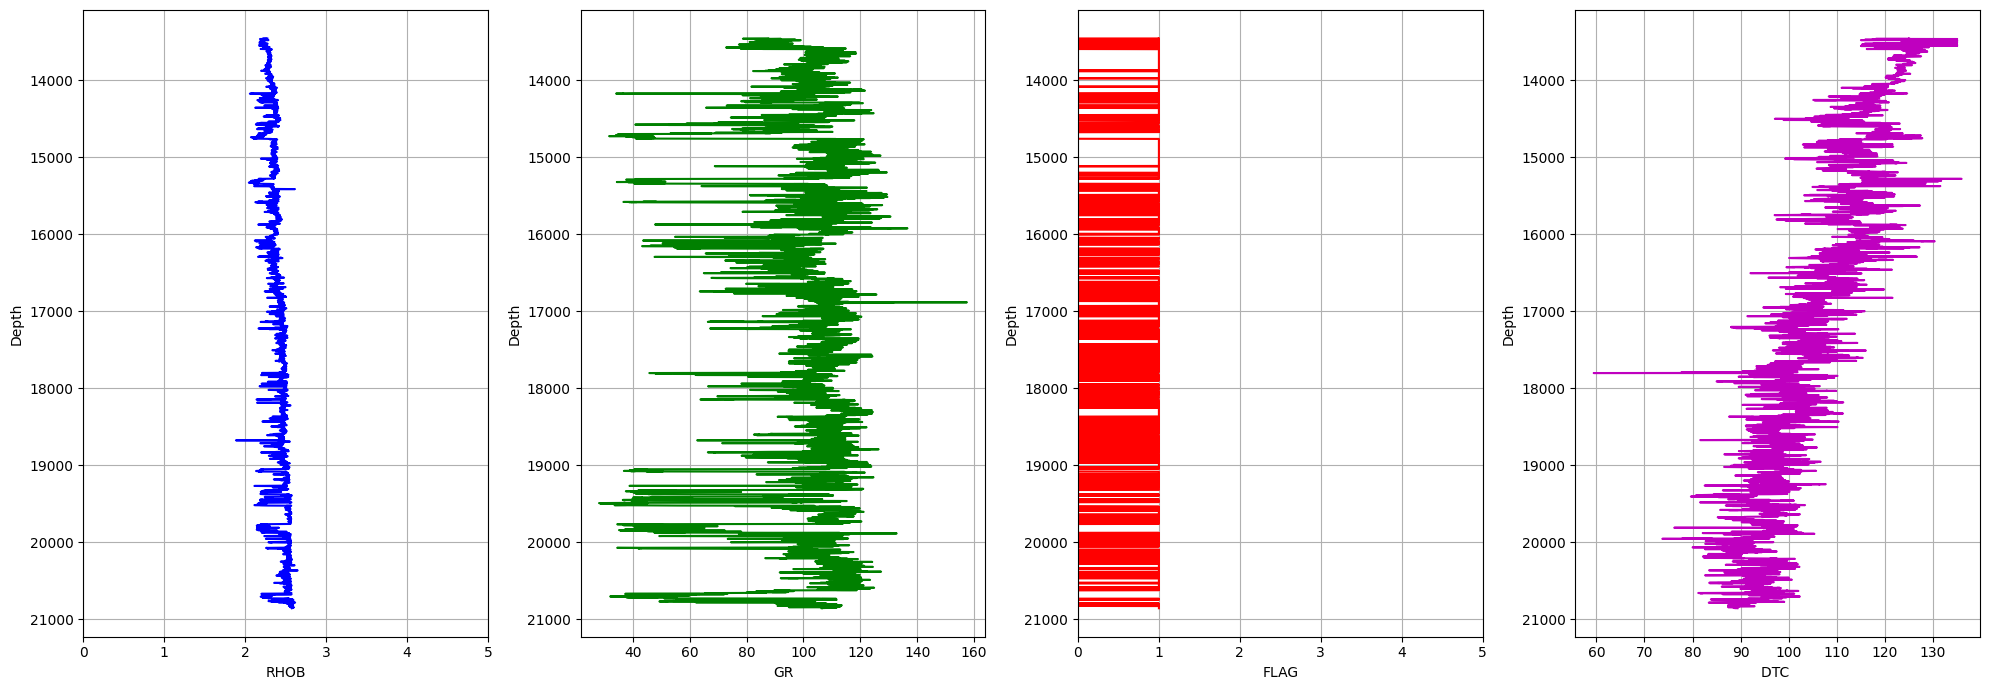

In [ ]:
import matplotlib.pyplot as plt

# Define the features to plot and their corresponding colors
plot_features = ['RHOB', 'GR', 'FLAG', 'DTC ']
feature_colors = ['b', 'g', 'r', 'm']  # One color for each feature
total_features = len(plot_features)

# Create subplots for each feature against depth
fig, axes = plt.subplots(1, total_features, figsize=(20, 7))

for idx, feature in enumerate(plot_features):
    axes[idx].plot(gm_dataframe[feature], gm_dataframe['DEPTH'], color=feature_colors[idx])
    axes[idx].invert_yaxis()  # Depth increases downward
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Depth')

    # Apply specific x-axis limits for selected features
    if feature in ['FLAG', 'RHOB']:
        axes[idx].set_xlim(0, 5)

    axes[idx].grid(True)

plt.tight_layout()
plt.show()


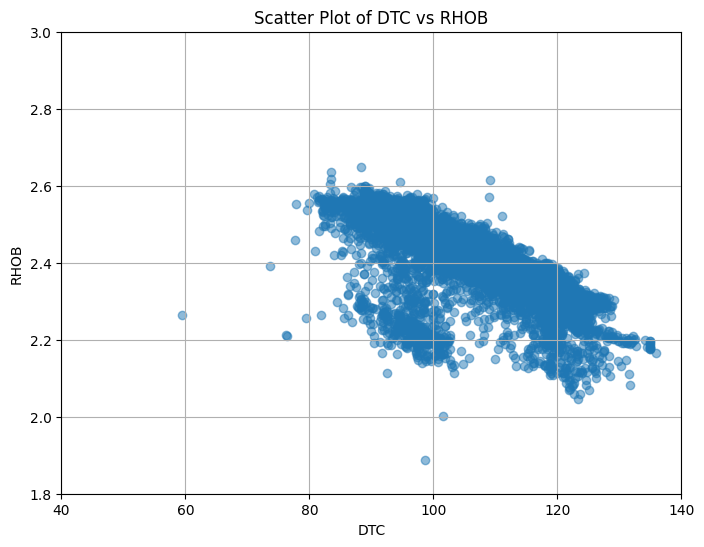

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: DTC vs RHOB from the cleaned dataset
plt.figure(figsize=(8, 6))

# Define axis limits for DTC (x-axis) and RHOB (y-axis)
dtc_limits = (40, 140)   # X-axis limits for DTC
rhob_limits = (3.0, 1.8) # Y-axis limits for RHOB

plt.scatter(gm_dataframe['DTC '], gm_dataframe['RHOB'], alpha=0.5)

plt.xlabel('DTC')
plt.ylabel('RHOB')
plt.title('Scatter Plot of DTC vs RHOB')

# Apply axis limits
plt.xlim(dtc_limits)
plt.ylim(rhob_limits)

# Invert y-axis so RHOB increases downward
plt.gca().invert_yaxis()

plt.grid(True)
plt.show()


**MID (Mineral Identification) Cross-Plot (DT vs. RHOB)**


Uses Sonic travel time (ΔT) vs. Bulk Density (RHOB).
Useful for distinguishing lithologies like shale, sandstone, limestone, and dolomite.

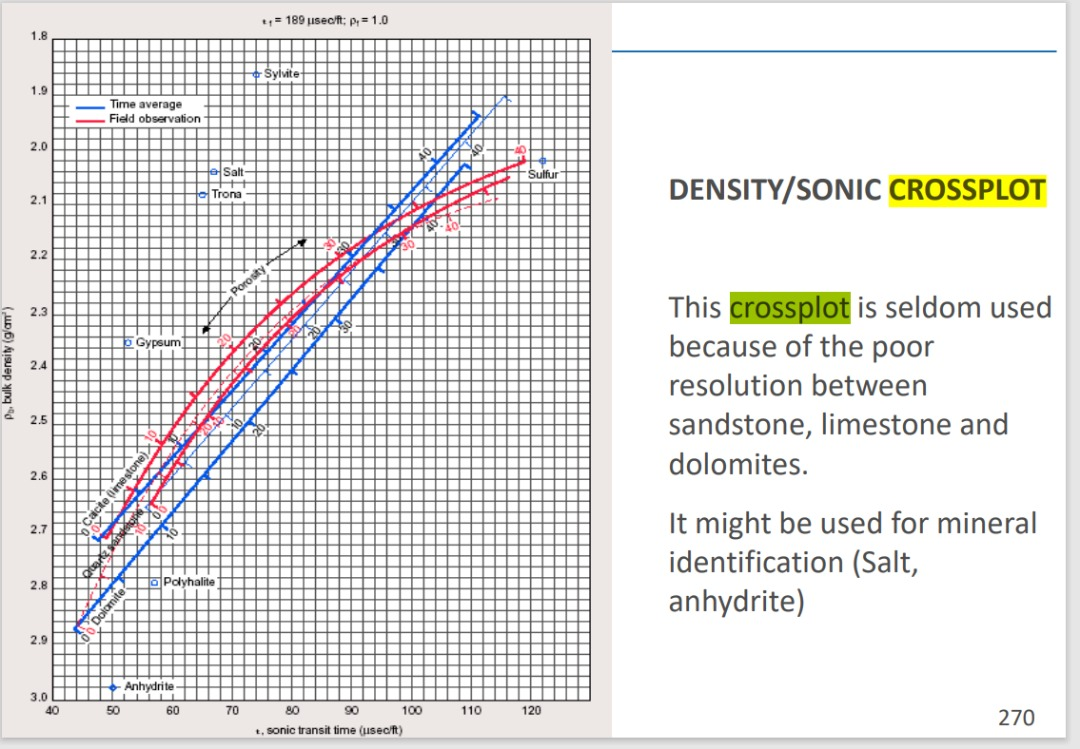

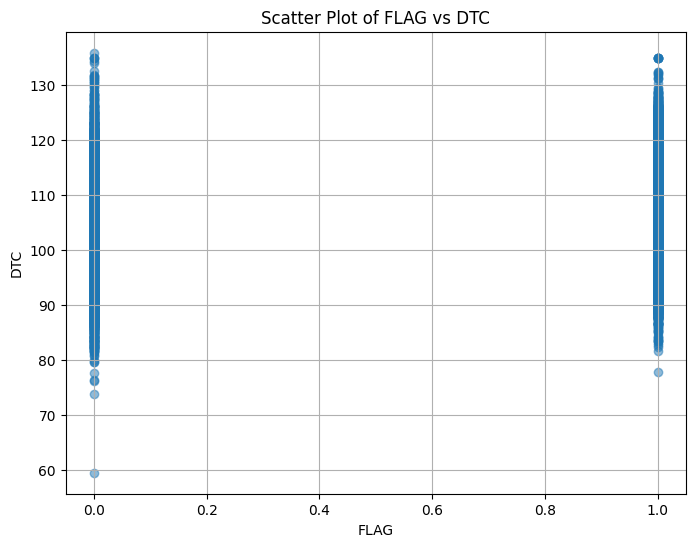

In [ ]:
# Scatter plot: FLAG vs DTC from the cleaned dataset
plt.figure(figsize=(8, 6))

plt.scatter(gm_dataframe['FLAG'], gm_dataframe['DTC '], alpha=0.5)

plt.xlabel('FLAG')
plt.ylabel('DTC')
plt.title('Scatter Plot of FLAG vs DTC')

plt.grid(True)
plt.show()


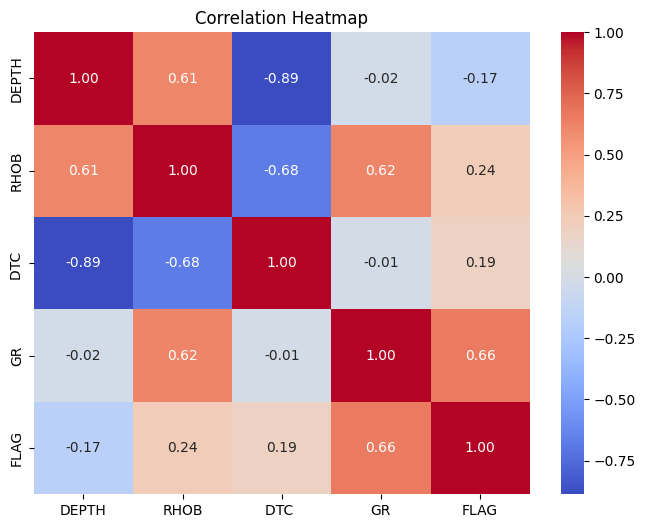

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and display a correlation heatmap for the cleaned dataset
plt.figure(figsize=(8, 6))

correlation_matrix = gm_dataframe.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Cleaned Dataset')
plt.show()


### Feature Scaling

In [ ]:
# Import library to standardize the data

from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a copy of the cleaned dataset for scaling or further processing
scaled_dataset = gm_dataframe.copy()

# Display the first few rows of the scaled dataset copy
print("Preview of the scaled dataset copy:")
print(scaled_dataset.head())


,DEPTH,RHOB,DTC,GR,FLAG
13456,13456,2.273648,125.0,87.574997,1.0
13457,13457,2.227900,125.0,86.948097,1.0
13458,13458,2.219200,125.0,81.518799,0.0
13459,13459,2.214700,125.0,78.682503,0.0
13460,13460,2.215400,125.0,79.144600,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Specify the features to normalize using StandardScaler
features_to_normalize = ['DEPTH', 'RHOB', 'GR']

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit the scaler and transform the selected features in the scaled dataset
scaled_dataset[features_to_normalize] = standard_scaler.fit_transform(scaled_dataset[features_to_normalize])

# Display the first few rows of the normalized dataset
print("Preview of the dataset after applying StandardScaler:")
print(scaled_dataset.head())


,DEPTH,RHOB,DTC,GR,FLAG
13456,-1.731817,-1.207821,125.0,-0.662562,1.0
13457,-1.731349,-1.643962,125.0,-0.695852,1.0
13458,-1.730881,-1.726906,125.0,-0.984165,0.0
13459,-1.730413,-1.769806,125.0,-1.134781,0.0
13460,-1.729945,-1.763132,125.0,-1.110242,0.0


### Split Data for Training, Testing and Validation

In [ ]:
# import sklearn train_test_split function
from sklearn.model_selection import train_test_split

In [ ]:
# Define the target variable (DTC) from the validation dataset
validation_target = validation_set['DTC ']


In [ ]:
# Separate the scaled dataset into input features (X) and target label (y)
X_features = scaled_dataset.drop(columns=['DTC '])  # Input features
y_target = scaled_dataset['DTC ']                   # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Shuffle and split the main dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_features, y_target, test_size=0.25, random_state=42
)

# Define the test set (features) using the validation_set separated earlier
X_test = validation_set.drop(columns=['DTC '])  # Test features (excluding 'DTC ' column)

# Note: 'DTC ' in validation_set is reserved as the true value for comparison after prediction


In [ ]:
# Import Modelling libraries
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):


    # Set up early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    training_history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict on the validation set
    val_predictions = model.predict(X_val)

    # Calculate evaluation metrics
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)
    val_rmse = val_mse ** 0.5

    print(f"Validation MAE: {val_mae:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}")

    return training_history, val_predictions


To benchmark our training, we will start off with a simple DNN with only 1 hidden layer

In [ ]:
import tensorflow as tf

# Define a simple Artificial Neural Network (ANN) model for regression
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with a single neuron for regression output
])

# Compile the ANN model with optimizer, loss function, and evaluation metric
ann_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


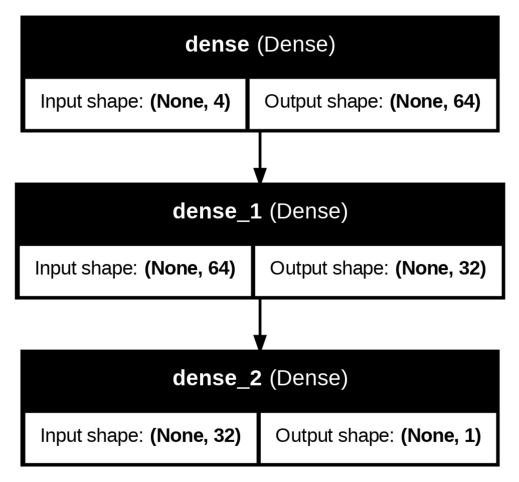

In [ ]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Save and visualize the ANN model architecture
plot_model(ann_model, to_file='ann_model_architecture.png', show_shapes=True, show_layer_names=True)

# Load and display the saved architecture image
architecture_image = plt.imread('ann_model_architecture.png')
plt.figure(figsize=(8, 6))
plt.imshow(architecture_image)
plt.axis('off')  # Hide axis ticks and labels
plt.show()


In [ ]:
# Train and evaluate the ANN model using the helper function
training_history, validation_predictions = train_and_evaluate_model(
    ann_model, X_train, y_train, X_val, y_val
)


Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10342.3838 - mae: 100.7829 - val_loss: 2518.4824 - val_mae: 47.7936
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1146.5569 - mae: 27.5930 - val_loss: 439.3896 - val_mae: 15.3664
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 389.1252 - mae: 14.4597 - val_loss: 257.6904 - val_mae: 12.0911
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 232.4183 - mae: 11.3947 - val_loss: 131.9793 - val_mae: 8.8870
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 110.4668 - mae: 8.0578 - val_loss: 63.0500 - val_mae: 6.1348
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53.6457 - mae: 5.6990 - val_loss: 33.9361 - val_mae: 4.5359
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31.8608 - mae: 4.3528 - val_loss: 23.2931 - val_mae: 3.6903
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 23.1393 - mae: 3.7104 - val_loss: 19.9877 - val_mae: 3.3991
Epoch 9/100

In [ ]:
def track_model_performance(training_history):

    # Extract available metrics from the training history
    available_metrics = list(training_history.history.keys())

    plt.figure(figsize=(12, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(training_history.history['loss'], label='Training Loss', color='blue')
    plt.plot(training_history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losss')
    plt.legend()

    plt.tight_layout()
    plt.show()


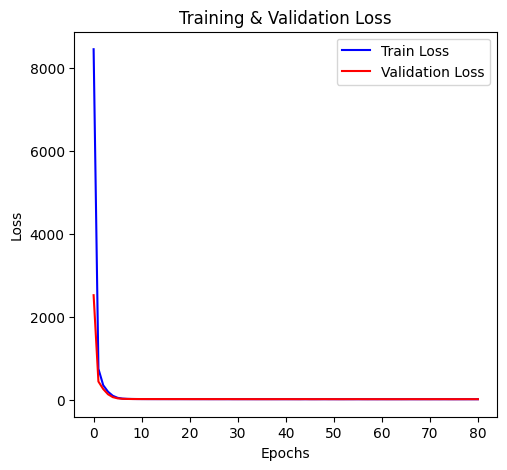

In [ ]:
# Visualize training and validation loss using the defined tracking function
track_model_performance(training_history)


In [ ]:
# Use the trained ANN model to make predictions on the test dataset
test_predictions = ann_model.predict(X_test)

# Create a DataFrame to store the predicted DTC values
predicted_dtc_df = pd.DataFrame(test_predictions, columns=['Predicted_DTC'])

# Display the first few rows of the predictions DataFrame
print("First five predicted DTC values for the test set:")
print(predicted_dtc_df.head())


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Predicted_DTC
0,133929.578125
1,133948.250000
2,133971.906250
3,133980.437500
4,134002.062500
